# A/B Test Experiment: Does our campaign increase our revenue?

In an effort to optimize our marketing strategy, we have launched a new campaign with the aim of boosting our revenue. The campaign involves targeted promotions and a redesigned user interface on our e-commerce platform. To evaluate its effectiveness, we are conducting an A/B test, comparing the impact on revenue between two groups—Group A, exposed to the new campaign, and Group B, the control group experiencing the existing marketing approach.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

## Exploratory data analysis (EDA)

In [2]:
#import the data
df = pd.read_csv("AB_Test_Results.csv")
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


In [3]:
#get data dtype of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


**Observations:** All of the dtypes for each columns its align with the type of data

In [4]:
#check null values
df.isnull().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

**Observations:** There is no null values on this dataframe

In [5]:
#check duplicate values
display(df[df.duplicated()])
print(f'There are {len(df[df.duplicated()])} duplicated data from this dataset')

,USER_ID,VARIANT_NAME,REVENUE
106,7704,control,0.0
195,8406,variant,0.0
224,7042,variant,0.0
302,4409,control,0.0
422,1621,variant,0.0
...,...,...,...
9989,2444,variant,0.0
9993,2400,variant,0.0
9994,3129,control,0.0
9995,1981,control,0.0


There are 2067 duplicated data from this dataset


**Observations:** Based on the code above, there are 2067 duplicates data, for doing an hypotesis test we need to make sure all of data is unique, 1 user is for 1 group of experiment either is control or variant. so we need to drop the duplicate data and make sure the proportion of data is not far away for each control and variant group.

In [6]:
#drop duplicate
df.drop_duplicates(inplace=True)

In [7]:
#to check the data is stil have duplicates
df[df.duplicated()]

,USER_ID,VARIANT_NAME,REVENUE


In [8]:
#check proportion of each group
df["VARIANT_NAME"].value_counts(normalize=True)

VARIANT_NAME
control    0.500819
variant    0.499181
Name: proportion, dtype: float64

**Observations:** If you can see the gap of proportion for each group is close. so there is no problem for data.

<Axes: xlabel='VARIANT_NAME', ylabel='count'>

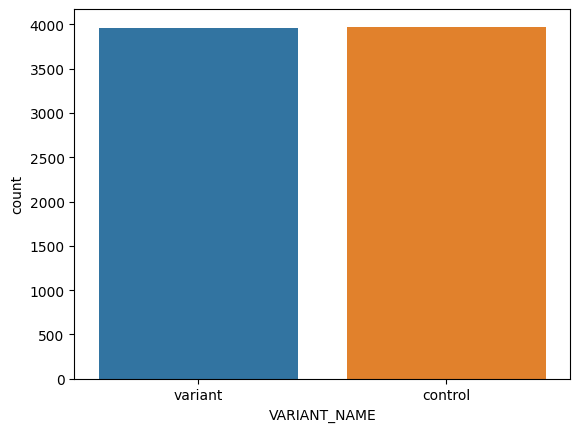

In [9]:
#Visualize distribution of the data
sns.countplot(data=df, x="VARIANT_NAME")

**Observations:** Trying to plot the distribution of data using countplot, so there is a little of gap between each of groups if we look closely to the screen :)

In [10]:
#check description statistics OF each group for revenue
df.loc[df["VARIANT_NAME"]== "control"].describe().T[1:]

,count,mean,std,min,25%,50%,75%,max
REVENUE,3973.0,0.161842,3.367815,0.0,0.0,0.0,0.0,196.01


In [11]:
df.loc[df["VARIANT_NAME"]== "variant"].describe().T[1:]


,count,mean,std,min,25%,50%,75%,max
REVENUE,3960.0,0.088755,1.479239,0.0,0.0,0.0,0.0,58.63


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

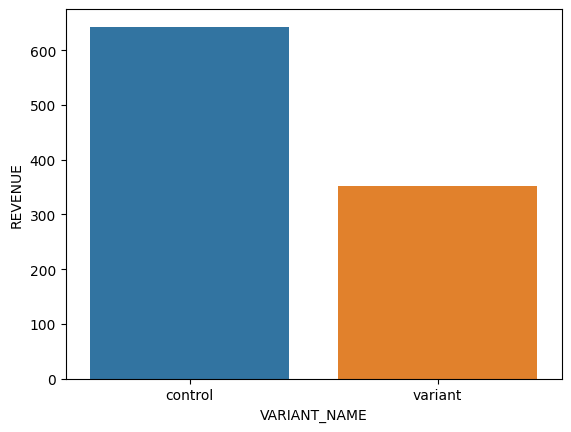

In [12]:
agg_df =df.groupby("VARIANT_NAME")["REVENUE"].sum().reset_index()
sns.barplot(data=agg_df, x="VARIANT_NAME", y="REVENUE")

**Observations:** Based on the descriptive statistics and barplot above, we can straight making conclusion without doing a hypotesis test, control group actually making a lots of revenue if we compare to the variant group.

BUT, statistics is how we dealing with uncertaincy, so we are still going to do a hypotesis test.

## Hypotesis testing
There are several steps that we should define before doing a hypotesis testing:
1. Formulate hypotesis
2. Calculate statistical test
3. Define decision rules
4. Conclusion

### 1. Formulate Hypothesis
- What to prove: **REVENUE** from variant group is greater than the control group.
- Let $p_1$ is the mean of variant group and $p_2$ is the mean of control group.

- Then we state null hypothesis ($H_0$) where should not do anything.
    - ($H_0$): The mean from variant group is less than or equal to mean from control group.
    $$H_0:P_1 \leq P_2$$

- Alternative hypothesis ($H_1$) is the opposite claim of ($H_0$)
    - ($H_1$): The mean from variant group is greater than mean from control group.
    $$H_1:P_1 > P_2$$

- Set significance level (alpha) = 0.05


### 2. Calculate statistical test
- Although we have large samples for both of groups, we dont know about the population standart deviation ($\sigma$), since in this dataset is only sample data, so we are going to use t-test for statistical test.
- But before conductiong the two sample t-test we need to find if the data of each groups have the same variance.

In [13]:
import numpy as np
control = df[df['VARIANT_NAME']== "control"]["REVENUE"].values
variant = df[df['VARIANT_NAME']== "variant"]["REVENUE"].values

np.var(control), np.var(variant)


(11.339322958309893, 2.187596758181563)

Based on the result, we can see that the variance is not equal for both the samples. Afterward, we can calculate statistics test and p-value using spicy library.

To calculate two sample t-test, we can use stats.ttest_ind
1. import library 
    - from scipy import stats
2. Use function `stats.ttest_ind(a=...., b=...., equal_var=True/False)`
    - `a`: First data group
    - `b`: Second data group
    - `equal_var = True` : The standard independent two sample t-test will be conducted by taking into consideration the equal population variances.
    - `equal_var = False` : The Welch’s t-test will be conducted by not taking into consideration the equal population variances.
3.The function will be able to return 2 output, namely statistic test and p_value.






In [14]:
from scipy import stats
result = stats.ttest_ind(a=variant, b=control, equal_var=False, alternative="greater")

In [15]:
result.pvalue

0.8947029161016975

In [16]:
result.statistic

-1.2520806669895643

### 3. Define Decision Rule

In [17]:
if result.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


In [18]:
dof = len(control) + len(variant) - 2
dof

7931

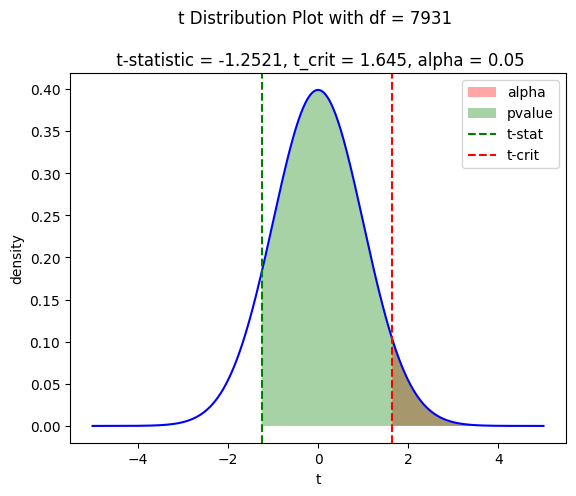

In [19]:
# plot sample distribution 
x = np.arange(-5, 5, 0.001)
plt.plot(x, stats.t.pdf(x, df = dof), 
         color='blue')

x_alpha = np.arange(stats.t.ppf(1-0.05, df = dof), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = dof)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = dof)

plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

plt.axvline(np.round(result.statistic, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = dof), 4)
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {dof} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

### 4.  Conclusion
- As the p_value > alpha(0.05), we cannot reject the $H_0$ since we dont have enough evidence, therefore we can say that mean from variant group is less than or equal to mean from control group.
- The company can keep using existing strategy for now
- Trying to cook up new strategy for campaign and before roll out the campaign lets do an experimentation again.

References:
https://www.kaggle.com/datasets/sergylog/ab-test-data